In [102]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

### How I did this hw (and also hw 3.4, 3.5 and 3.6) ? 
I asked Vicky, of course, and he taught me 555 (plus a whole lot of doc reading myself =.=)


### Homework 3.3 - Please Help The Cat

A poor cat is trapped on canvas by an evil witch. Please help releasing the cat by breaking the curse using Discrete Fourier Transform learned in our magic class.

You may find the image at `images/poor-cat-trapped-on-canvas.jpg`. Note that the image has 3 color channels (RGB).

Please remember that the examples shown in class uses the book of spells from the ancient library. Try searching the newer spells on the internet.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

<img src="images/poor-cat-trapped-on-canvas.jpg" alt="A poor cat trapped on canvas" width="400">

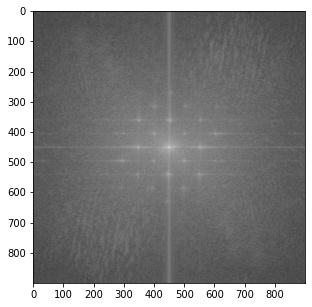

In [146]:
# Get the image 
img = cv2.imread('images/poor-cat-trapped-on-canvas.jpg', 0) 

#Do dft on the image // convert to float32 bc docs says so 
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero freq to the center of the image 
dft_shift = np.fft.fftshift(dft)

# Get the magnitude spectrum
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

plt.figure(figsize = (5,5))
plt.imshow(magnitude_spectrum, cmap ='gray')

In [147]:
# Get the min and max values of the image 
minv = np.amin(img)
maxv = np.amax(img)

# Get the magnitude and the phase 
magnitude, phase = cv2.cartToPolar(dft_shift[:,:,0], dft_shift[:,:,1])

# Get the spectrum of the magnitude (which is the same thing as the above part, but this case we want the phase)
# so we are using cartToPolar to get both out and use only magnitude to make magnitude spectrum
spectrum = np.log(magnitude) / 20

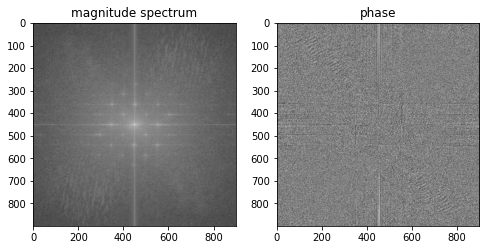

In [148]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8,8))
ax1.imshow(spectrum, cmap = 'gray');
ax1.set_title('magnitude spectrum');
ax2.imshow(phase, cmap = 'gray');
ax2.set_title('phase');

In [149]:
# Get shape, row, col, center coords 
row, col = img.shape
cen_row, cen_col = row//2, col//2

In [150]:
# set threshold // if pixel value > threshold --> set to max, else set to min 
# source, threshold value, max value, type

# Get threshold of the image to only choose the bright spots in the spectrum
mask = cv2.threshold(spectrum, 0.6, 1, cv2.THRESH_BINARY)[1]

# apply mask 
mask = cv2.rectangle(mask, (cen_row - 30, cen_col - 30), (cen_row + 30, cen_col + 30), color = (0,0,0)
                     , thickness = -1)

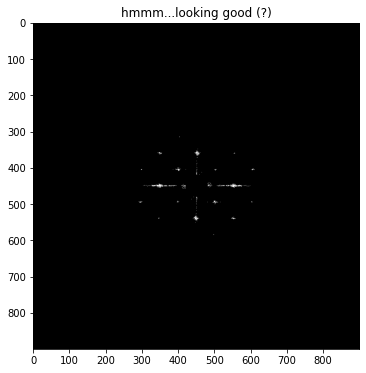

In [151]:
plt.figure(figsize = (6,6))
plt.imshow(mask, cmap = 'gray')
plt.title('hmmm...looking good (?)');

In [153]:
# apply mask to magnitude, covering the parts where it is white dots in the mask 
for i in range(900):
    for j in range(900):
        if mask[i][j] != 0:
            magnitude[i][j] = 0

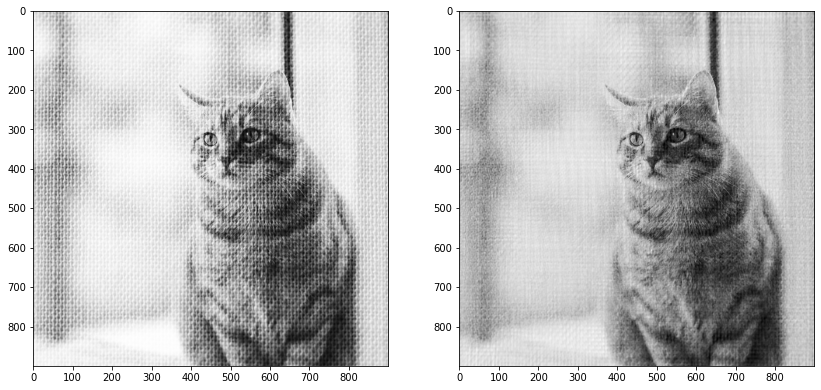

In [155]:
# convert the magnitude and phase back into cartisian (real, imaginary) and merge them 
inv_img = cv2.merge(cv2.polarToCart(magnitude, phase))

# inverse the shift to bring the zero freq up to the corner 
img_ishift = np.fft.ifftshift(inv_img)

# inverse the dft
img_idft = cv2.idft(img_ishift)

# combine the real and the imaginary part
img_idft = cv2.magnitude(img_idft[:,:,0], img_idft[:,:,1])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,14))
ax1.imshow(img, cmap = 'gray');
ax2.imshow(img_idft, cmap = 'gray');

Seems like the cat is no longer trapped now... I guess ? 

Anddd...of course...it wouldn't be me if I didn't find a way to have fun with things

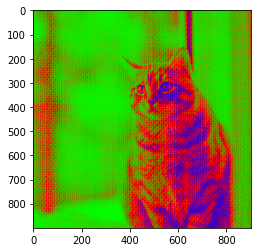

In [175]:
plt.imshow(img, cmap = 'brg')

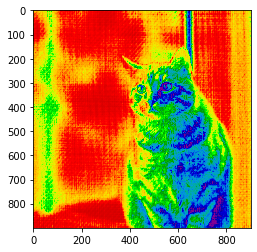

In [176]:
plt.imshow(img_idft, cmap = 'nipy_spectral')

So cool